In [1]:
import numpy as np
import pandas as pd
import datetime
from scipy.stats import norm
import matplotlib.pyplot as plt

In [22]:
def formatDates(arr,date_format="%Y-%m-%d %H:%M"):
    return [datetime.datetime.strptime(d, date_format) for d in arr]

def stripCharacter(arr,c,r=''):
    return [e.replace(c, r) for e in arr]

def str2Float(arr):
    return np.array([float(e) for e in arr])

def getDate(t, strt_date):
    return datetime.datetime.strptime(strt_date, "%Y-%m-%d") + datetime.timedelta(days=t) 

def x2Percent(x):
    return 100*(x - 1)

def percent2X(percent):
    return 1 + percent/100

In [23]:
apy = pd.read_csv('../resources/klima_apy.csv')
apy = apy.assign(time = formatDates(apy['time'].values))
apy = apy.assign(rebase = stripCharacter(apy['rebase'].values,'%'))
apy = apy.assign(rebase = str2Float(apy['rebase'].values))
apy = apy.assign(standard_apy = 100*str2Float(apy['standard_apy'].values))
apy = apy.assign(adjusted_apy = 100*str2Float(apy['standard_apy'].values))
apy = apy.sort_values(by='time')

In [29]:
market_value_treasury = pd.read_csv('../resources/klima_treasury.csv')
market_value_treasury = market_value_treasury.assign(time = formatDates(market_value_treasury['time'].values))

arr = np.array(stripCharacter(market_value_treasury['treasury_mv'].values,'$'))
arr = np.array(stripCharacter(arr,','))
arr = str2Float(arr)
market_value_treasury['treasury_mv'] = arr

for colnm in market_value_treasury.columns[2:]:
    arr = market_value_treasury[colnm].values
    arr = str2Float(arr)
    market_value_treasury[colnm] = arr
market_value_treasury = market_value_treasury.sort_values(by='time') 


In [30]:
market_value_treasury.head(3)

,time,treasury_mv,bct_mv,klima_bct_mv,bct_usdc_mv
50,2021-10-18,62649623.0,1.063877e+07,3.417420e+07,1.783665e+07
49,2021-10-19,43938934.0,6.307725e+06,2.539043e+07,1.224078e+07
48,2021-10-20,38893865.0,4.642585e+06,2.268200e+07,1.156928e+07


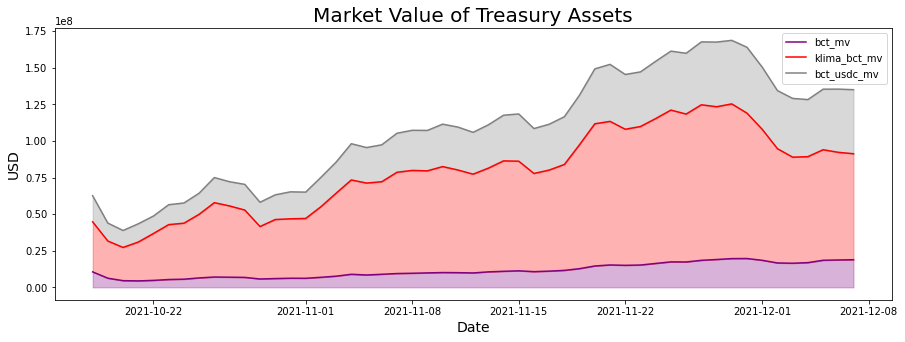

In [52]:
df = market_value_treasury
colnms = df.columns[2:]
colors = ['purple','red','grey','green','blue']
fig = plt.figure(figsize=(15, 5))
dates = df['time'].values
aggr = np.zeros(len(df))
for k in range(len(colnms)):  
    prev_aggr = aggr
    aggr = aggr + df[colnms[k]].values
    plt.plot(dates, aggr, label=colnms[k],color=colors[k])      
    plt.fill_between(dates, prev_aggr, aggr, alpha=0.3, color=colors[k])
plt.xlabel('Date', fontsize=14)
plt.ylabel('USD', fontsize=14)
plt.title('Market Value of Treasury Assets', fontsize=20)
plt.legend()
fig.savefig('../img/klima_treasury.png')

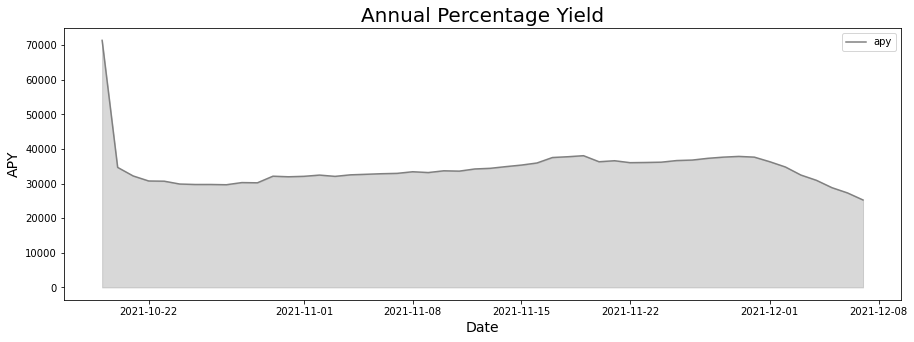

In [34]:
df = apy
df = df.assign(time = df['time'].values.astype('datetime64[D]'))
df.drop_duplicates(subset = "time", keep='first', inplace = True)
colnms = df.columns[2:]
colors = ['purple','red','grey','green','blue']
fig = plt.figure(figsize=(15, 5))
dates = df['time'].values
aggr = np.zeros(len(df))
plt.plot(dates, df['standard_apy'].values, label='apy',color=colors[k])      
plt.fill_between(dates, aggr, df['standard_apy'].values, alpha=0.3, color=colors[k])
plt.xlabel('Date', fontsize=14)
plt.ylabel('APY', fontsize=14)
plt.title('Annual Percentage Yield', fontsize=20)
plt.legend()

In [40]:
df2.head(4)

,time,rebase_time,rebase_30_ma,rebase,standard_apy,adjusted_apy
0,2021-10-19,NaN,NaN,0.60184,71369.110036,7.136911e+06
1,2021-10-20,7.943056,7.943056,0.53555,34674.987587,3.467499e+06
2,2021-10-21,8.033333,7.836806,0.52875,32201.789846,3.220179e+06
3,2021-10-22,7.774444,7.704410,0.52452,30748.909039,3.074891e+06


In [41]:
df = market_value_treasury
df = df.assign(time = df['time'].values.astype('datetime64[D]'))
df.reset_index(drop=True, inplace=True)

df2 = apy
df2 = df2.assign(time = df2['time'].values.astype('datetime64[D]'))
df2.drop_duplicates(subset = "time", keep='first', inplace = True)
df2.reset_index(drop=True, inplace=True)

df = pd.merge(df2, df, on ='time', how ="left")

In [43]:
df.head(6)

,time,rebase_time,rebase_30_ma,rebase,standard_apy,adjusted_apy,treasury_mv,bct_mv,klima_bct_mv,bct_usdc_mv
0,2021-10-19,NaN,NaN,0.60184,71369.110036,7.136911e+06,43938934.0,6.307725e+06,2.539043e+07,1.224078e+07
1,2021-10-20,7.943056,7.943056,0.53555,34674.987587,3.467499e+06,38893865.0,4.642585e+06,2.268200e+07,1.156928e+07
2,2021-10-21,8.033333,7.836806,0.52875,32201.789846,3.220179e+06,43451740.0,4.476308e+06,2.652971e+07,1.244572e+07
3,2021-10-22,7.774444,7.704410,0.52452,30748.909039,3.074891e+06,48781823.0,4.828786e+06,3.203015e+07,1.192289e+07
4,2021-10-23,7.838611,7.743813,0.52434,30688.764918,3.068876e+06,56503923.0,5.414567e+06,3.749081e+07,1.359855e+07
5,2021-10-24,7.381944,7.692024,0.52185,29868.061084,2.986806e+06,57660085.0,5.641624e+06,3.823977e+07,1.377869e+07


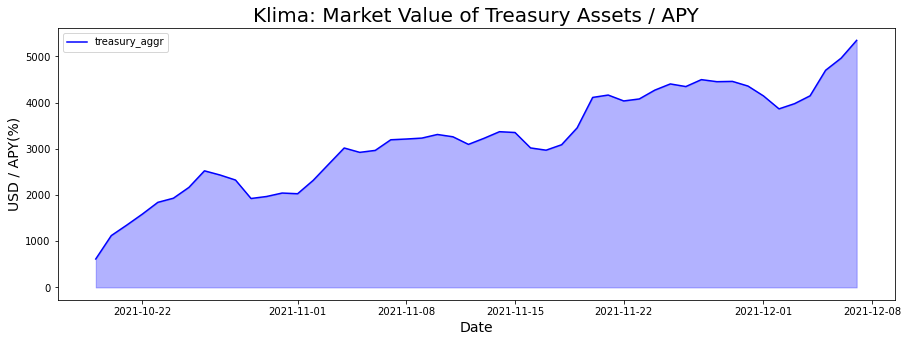

In [50]:
df = market_value_treasury
df = df.assign(time = df['time'].values.astype('datetime64[D]'))
df.reset_index(drop=True, inplace=True)

df2 = apy
df2 = df2.assign(time = df2['time'].values.astype('datetime64[D]'))
df2.drop_duplicates(subset = "time", keep='first', inplace = True)
df2.reset_index(drop=True, inplace=True)

df = pd.merge(df2, df, on ='time', how ="left")

colnms = df.columns[9:]
colors = ['purple','red','grey','green','blue']
fig = plt.figure(figsize=(15, 5))
dt = df['time'].values
apy_arr = df['standard_apy'].values
aggr = np.zeros(len(df))
for k in range(len(colnms)):  
    prev_aggr = aggr
    aggr = aggr + df[colnms[k]].values
    
plt_aggr = df['treasury_mv'].values/apy_arr
plt.plot(dt, plt_aggr, label='treasury_aggr',color='blue')      
plt.fill_between(dt, np.zeros(len(df)), plt_aggr, alpha=0.3, color='blue')
plt.xlabel('Date', fontsize=14)
plt.ylabel('USD / APY(%)', fontsize=14)
plt.title('Klima: Market Value of Treasury Assets / APY', fontsize=20)
fig.savefig('../img/klima_treasury_apy.png')
plt.legend()